
## 🎯 Goal
To demonstrate how **tensor decomposition** can extract interpretable, latent patterns from multivariate time-series data.

### 🧪 Dataset
A synthetic 3D tensor simulating measurements from:
- 4 sensors
- Over 48 time steps
- 6 distinct features

Anomalies were injected at known time-sensor-feature points to validate interpretability.

### 🧠 Method
We applied **CP (CANDECOMP/PARAFAC) decomposition** with rank=3 using Tensorly. This decomposes the 3D tensor into three matrices:
- **Time factor**: how temporal patterns align with components
- **Sensor factor**: how sensors contribute to each component
- **Feature factor**: how features load on the components

### 📊 Results
- Factor matrices reveal interpretable patterns across sensors and features.
- Clear temporal patterns are visible in the time factor.
- Spikes in component intensity can hint at structural anomalies.

### 🔍 Applications
- Time-series anomaly detection
- Feature compression
- Sensor correlation analysis
- Model input for downstream ML

### 🔗 Future Work
- Use real-world datasets (e.g., environmental, industrial, or finance)
- Apply sparse or regularized tensor models
- Integrate anomaly detection thresholds using reconstruction error

---


In [3]:

!pip install tensorly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 67.3 MB/s eta 0:00:00


In [4]:
# Cell 1: Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorly as tl
from tensorly.decomposition import parafac
tl.set_backend('numpy')


In [5]:

# Parameters
time_steps = 48  # e.g., hourly data over 2 days
sensors = 4      # simulate 4 IoT sensors
features = 6     # 6 features per sensor (e.g., temp, humidity, voltage, etc.)

t = np.linspace(0, 4*np.pi, time_steps)
base_signal = np.sin(t)

data_tensor = np.zeros((time_steps, sensors, features))

for s in range(sensors):
    for f in range(features):
        variation = np.random.rand() * 0.5
        noise = np.random.normal(0, 0.05, size=time_steps)
        data_tensor[:, s, f] = base_signal * (1 + variation) + noise

# Add small anomalies
data_tensor[10, 2, 4] += 3
data_tensor[30, 0, 1] -= 2

print("Tensor shape:", data_tensor.shape)


Tensor shape: (48, 4, 6)


In [6]:
rank = 3
weights, factors = parafac(data_tensor, rank=rank, init='random', tol=1e-6)
time_factor, sensor_factor, feature_factor = factors


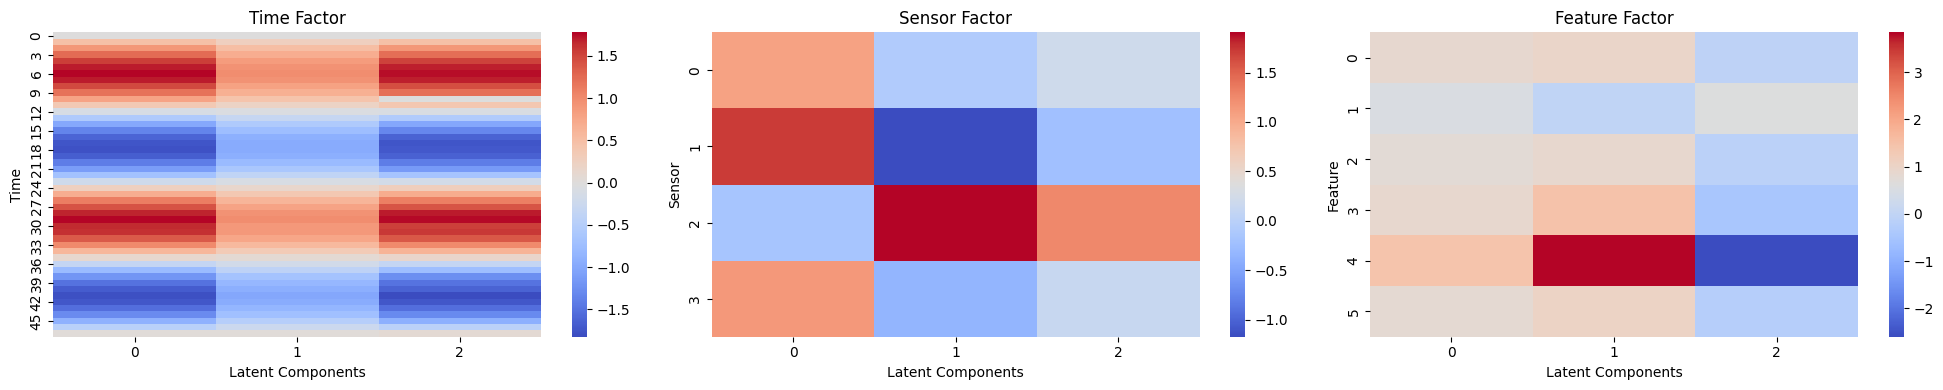

In [7]:

fig, axs = plt.subplots(1, 3, figsize=(20, 4))

def plot_factor(ax, factor, label):
    sns.heatmap(factor, cmap='coolwarm', ax=ax)
    ax.set_title(f'{label} Factor')
    ax.set_xlabel('Latent Components')
    ax.set_ylabel(label)

plot_factor(axs[0], time_factor, 'Time')
plot_factor(axs[1], sensor_factor, 'Sensor')
plot_factor(axs[2], feature_factor, 'Feature')

plt.tight_layout()
plt.show()
